In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [7]:
df = pd.read_csv('CombinedBooksRandomized.csv')
df
# df = pd.read_csv("CombinedBooksRandomized.csv")
# X = df.loc[:,"Author Average Rating":"Raters"].values

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien..."
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A..."
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe..."
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His..."
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti..."
...,...,...,...,...,...,...,...,...,...,...
1723,The Bear and the Nightingale (The Winternight ...,Katherine Arden,4.23,353862,48530,14,2017,4.10,170787,"Fantasy,Historical,Fiction,Young Adult,Histori..."
1724,Only Superhuman,Christopher L. Bennett,3.87,15137,1503,60,2012,2.86,389,"Science Fiction,Fiction,Comics,Fantasy,Sequent..."
1725,"Delirium (Delirium, #1)",Lauren Oliver,3.88,1385551,106047,51,2011,3.96,452659,"Young Adult,Science Fiction,Romance,Science Fi..."
1726,A Tree Grows in Brooklyn (Paperback),Betty Smith,4.28,448442,25874,15,1943,4.29,434302,"Classics,Fiction,Historical,Young Adult,Young ..."


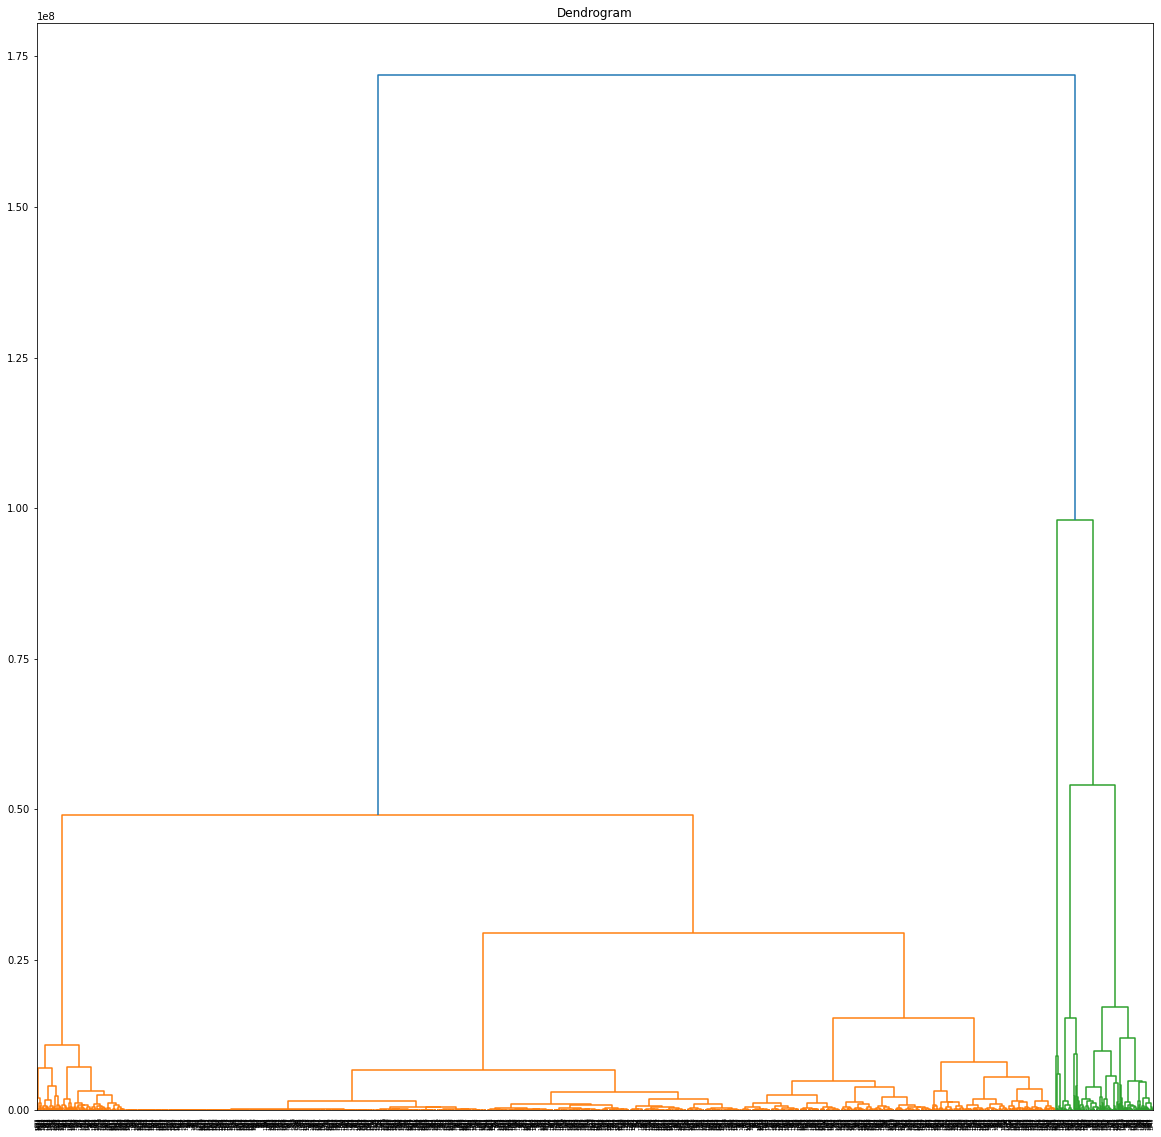

In [8]:
plt.figure(figsize=(20, 20))
plt.title("Dendrogram")

selected_data = df.loc[:,"Author Average Rating":"Raters"].values
hc = shc.linkage(selected_data, method='ward', metric="euclidean")
dend = shc.dendrogram(Z=hc)

plt.show()

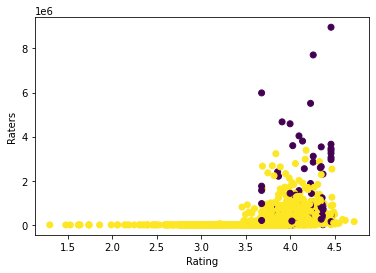

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,Cluster
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien...",1
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A...",1
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe...",1
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His...",1
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti...",0
...,...,...,...,...,...,...,...,...,...,...,...
1723,The Bear and the Nightingale (The Winternight ...,Katherine Arden,4.23,353862,48530,14,2017,4.10,170787,"Fantasy,Historical,Fiction,Young Adult,Histori...",1
1724,Only Superhuman,Christopher L. Bennett,3.87,15137,1503,60,2012,2.86,389,"Science Fiction,Fiction,Comics,Fantasy,Sequent...",1
1725,"Delirium (Delirium, #1)",Lauren Oliver,3.88,1385551,106047,51,2011,3.96,452659,"Young Adult,Science Fiction,Romance,Science Fi...",1
1726,A Tree Grows in Brooklyn (Paperback),Betty Smith,4.28,448442,25874,15,1943,4.29,434302,"Classics,Fiction,Historical,Young Adult,Young ...",1


In [9]:
x = df.loc[:,"Author Average Rating"].values
y = df.loc[:,"Raters"].values 
selected_data = df.loc[:,"Author Average Rating":"Raters"].values
hierarchical= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

ypred = hierarchical.fit_predict(selected_data)
df["Cluster"] = ypred

plt.scatter(x, y, c=ypred)
plt.xlabel("Rating")
plt.ylabel("Raters")
plt.show()
df

In [10]:
X = df.loc[:,"Author Average Rating":"Raters"].values

score = silhouette_score(X,ypred)
print(score)

0.8379077341255123
